In [1]:
import torch
from torch import nn 
import torchvision
from torchvision import datasets, transforms  
import matplotlib.pyplot as plt



In [2]:
def draw(epoches,Loss_list,Accuracy_list):
    x1 = range(0, epoches)
    x2 = range(0, epoches)
    y1 = Accuracy_list
    y2 = Loss_list
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'o-')
    plt.title('Test accuracy vs. epoches')
    plt.ylabel('Test accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, '.-')
    plt.xlabel('Test loss vs. epoches')
    plt.ylabel('Test loss')
    plt.show()

In [5]:
transform = transforms.Compose([  
    transforms.Resize((32, 32)),  # 将图片调整为32x32  
    transforms.ToTensor(),         # 将图片转为Tensor  
    transforms.Normalize((0.1307,), (0.3081,))  # 进行正则化  
])
transformresnet = transforms.Compose([  
    transforms.Resize((224, 224)),  # 将图片调整为32x32  
    transforms.ToTensor(),         # 将图片转为Tensor  
    transforms.Normalize((0.1307,), (0.3081,))  # 进行正则化  
])

# 读取已经下载的训练数据集  
train_set = datasets.MNIST(root='F:\\study\\wxg\\3\\mnist', train=True, download=False, transform=transform)  
train_setresnet = datasets.MNIST(root='F:\\study\\wxg\\3\\mnist', train=True, download=False, transform=transformresnet)  

# 读取已经下载的测试数据集  
test_set = datasets.MNIST(root='F:\\study\\wxg\\3\\mnist', train=False, download=False, transform=transform)  
test_setresnet = datasets.MNIST(root='F:\\study\\wxg\\3\\mnist', train=False, download=False, transform=transformresnet)  

# 使用 DataLoader 加载数据集  
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)  
testloader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)  
trainloaderresnet = torch.utils.data.DataLoader(train_setresnet, batch_size=64, shuffle=True)  
testloaderresnet = torch.utils.data.DataLoader(test_setresnet, batch_size=32, shuffle=False) 
# 检查数据是否加载成功  
for images, labels in trainloader:  
    print(images.shape)  # 输出训练样本的形状  
    print(labels.shape)  # 输出训练标签的形状  
    break  # 只查看第一批数据  
for images, labels in trainloaderresnet:  
    print(images.shape)  # 输出训练样本的形状  
    print(labels.shape)  # 输出训练标签的形状  
    break  # 只查看第一批数据  

torch.Size([64, 1, 32, 32])
torch.Size([64])
torch.Size([64, 1, 224, 224])
torch.Size([64])


In [4]:
def draw1(epoches,Loss_list,Accuracy_list):
    x1 = range(0, epoches)
    x2 = range(0, epoches)
    y1 = Accuracy_list
    y2 = Loss_list
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'o-')
    plt.title('Test accuracy vs. epoches')
    plt.ylabel('Test accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, '.-')
    plt.xlabel('Test loss vs. epoches')
    plt.ylabel('Test loss')
    plt.show()
    #plt.savefig("accuracy_loss.jpg")

In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        # 定义网络层  
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)  
        self.fc3 = nn.Linear(84, 10)  

    def forward(self, x):  
        # 定义前向传播过程  
        x = nn.functional.relu(self.conv1(x))  
        x = nn.functional.max_pool2d(x, 2)  
        x = nn.functional.relu(self.conv2(x))  
        x = nn.functional.max_pool2d(x, 2)  
        x = x.view(-1, 16 * 5 * 5)  # flatten  
        x = nn.functional.relu(self.fc1(x))  
        x = nn.functional.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x  
    


In [5]:
class vgg16(nn.Module):
    def __init__(self,):
        super(vgg16,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,64,kernel_size=3,padding=1),
            nn.GELU(),
            nn.Conv2d(64,64,3,padding=1),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=2,stride=2),#这里使用两个3X3的卷积核代替5X5


            nn.Conv2d(64, 128, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.MaxPool2d(kernel_size=2, stride=2),  


            nn.Conv2d(128, 256, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.MaxPool2d(kernel_size=2, stride=2), 

            nn.Conv2d(256, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.MaxPool2d(kernel_size=2, stride=2), 

            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  
            nn.GELU(),  
            nn.MaxPool2d(kernel_size=2, stride=2), 
        )


        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),  
            nn.GELU(),  
            nn.Dropout(),  
            nn.Linear(4096, 4096),  
            nn.GELU(),  
            nn.Dropout(),  #防过拟合
            nn.Linear(4096, 10),  
        )

    def forward(self,x):
        x = self.features(x)
        x = x.view(x.size(0),-1)
        x = self.classifier(x)
        return x



In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  


epoch: 1, Train Loss: 2.286850, Train Acc: 0.168610
epoch: 2, Train Loss: 2.218702, Train Acc: 0.516058
epoch: 3, Train Loss: 1.644659, Train Acc: 0.655567
epoch: 4, Train Loss: 0.681787, Train Acc: 0.811584
epoch: 5, Train Loss: 0.477355, Train Acc: 0.861441
epoch: 6, Train Loss: 0.402458, Train Acc: 0.882229
epoch: 7, Train Loss: 0.356858, Train Acc: 0.894839
epoch: 8, Train Loss: 0.322592, Train Acc: 0.905017
epoch: 9, Train Loss: 0.294979, Train Acc: 0.913113
epoch: 10, Train Loss: 0.272403, Train Acc: 0.919693
epoch: 11, Train Loss: 0.251663, Train Acc: 0.925806
epoch: 12, Train Loss: 0.233844, Train Acc: 0.931153
epoch: 13, Train Loss: 0.217555, Train Acc: 0.935384
epoch: 14, Train Loss: 0.202825, Train Acc: 0.940282
epoch: 15, Train Loss: 0.189687, Train Acc: 0.943897
epoch: 16, Train Loss: 0.178361, Train Acc: 0.946928
epoch: 17, Train Loss: 0.167637, Train Acc: 0.950626
epoch: 18, Train Loss: 0.157999, Train Acc: 0.952992
epoch: 19, Train Loss: 0.150067, Train Acc: 0.955940
ep

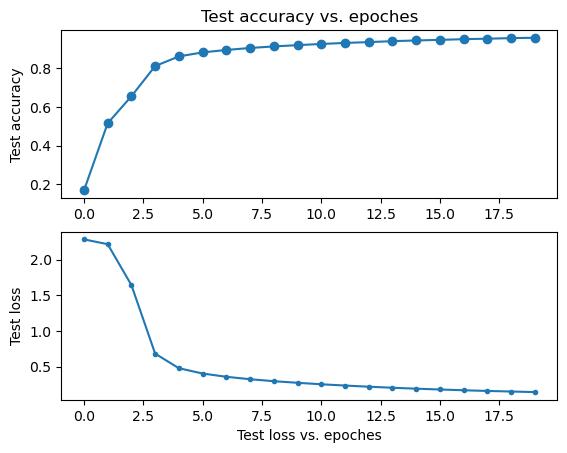

Train Loss: 0.126210, Train Acc: 0.962260


In [16]:
example = LeNet().to(device)

lr = 0.001
epoches = 20
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(example.parameters(),lr=lr)
loss_list = []
accuracy_list = []
loss_list1 = []
accuracy_list1 = []

for epoch in range(epoches):
    train_loss = 0
    train_acc = 0
    for img,label in trainloader:
        img,label = img.to(device),label.to(device)
        output = example(img)
        loss = criterion(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _,pred = output.max(1)
        num_correct = (pred==label).sum().item()
        acc = num_correct / img.shape[0]
        train_acc += acc
    loss_list.append(train_loss/len(trainloader))
    accuracy_list.append(train_acc/len(trainloader))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}'.format(epoch+1, train_loss/len(trainloader), train_acc/len(trainloader)))
draw(epoches,loss_list,accuracy_list)

test_loss = 0
test_acc = 0
for img,label in testloader:
    img,label = img.to(device),label.to(device)
    output = example(img)
    loss = criterion(output,label)
    optimizer.zero_grad()
    test_loss += loss.item()
    _,pred = output.max(1)
    num_correct = (pred==label).sum().item()
    acc = num_correct / img.shape[0]
    test_acc += acc
loss_list1.append(test_loss/len(testloader))
accuracy_list1.append(test_acc/len(testloader))
print('Train Loss: {:.6f}, Train Acc: {:.6f}'.format( test_loss/len(testloader), test_acc/len(testloader)))


        



In [7]:
def he_init(m):  
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):  
        # 使用 He 初始化  
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')  
        if m.bias is not None:  
            nn.init.zeros_(m.bias)  # 偏置初始化为零

In [8]:
lr = 0.000001
epoches = 1000
examplevgg16 = vgg16().to(device)
vggcriterion = nn.CrossEntropyLoss().to(device)
vggoptimizer = torch.optim.Adam(examplevgg16.parameters(),lr=lr)
vggloss_list = []
vggaccuracy_list = []
vggloss_list1 = []
vggaccuracy_list1 = []
he_init(examplevgg16)


In [9]:
for epoch in range(epoches):
    train_loss = 0
    train_acc = 0
    for img,label in trainloader:
        img,label = img.to(device),label.to(device)
        output = examplevgg16(img)
        loss = vggcriterion(output,label)
        vggoptimizer.zero_grad()
        loss.backward()
        vggoptimizer.step()
        train_loss += loss.item()
        _,pred = output.max(1)
        num_correct = (pred==label).sum().item()
        acc = num_correct / img.shape[0]
        train_acc += acc
    vggloss_list.append(train_loss/len(trainloader))
    vggaccuracy_list.append(train_acc/len(trainloader))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}'.format(epoch+1, train_loss/len(trainloader), train_acc/len(trainloader)))
draw(epoches,vggloss_list,vggaccuracy_list)

epoch: 1, Train Loss: 2.302237, Train Acc: 0.105910
epoch: 2, Train Loss: 2.301689, Train Acc: 0.112323
epoch: 3, Train Loss: 2.301430, Train Acc: 0.112373
epoch: 4, Train Loss: 2.301274, Train Acc: 0.112373
epoch: 5, Train Loss: 2.301239, Train Acc: 0.112323
epoch: 6, Train Loss: 2.301242, Train Acc: 0.112407
epoch: 7, Train Loss: 2.301209, Train Acc: 0.112390
epoch: 8, Train Loss: 2.301211, Train Acc: 0.112423
epoch: 9, Train Loss: 2.301208, Train Acc: 0.112340
epoch: 10, Train Loss: 2.301170, Train Acc: 0.112373
epoch: 11, Train Loss: 2.301184, Train Acc: 0.112340
epoch: 12, Train Loss: 2.301195, Train Acc: 0.112457
epoch: 13, Train Loss: 2.301180, Train Acc: 0.112357
epoch: 14, Train Loss: 2.301187, Train Acc: 0.112340
epoch: 15, Train Loss: 2.301216, Train Acc: 0.112340
epoch: 16, Train Loss: 2.301171, Train Acc: 0.112323
epoch: 17, Train Loss: 2.301225, Train Acc: 0.112373
epoch: 18, Train Loss: 2.301218, Train Acc: 0.112323
epoch: 19, Train Loss: 2.301199, Train Acc: 0.112357
ep

KeyboardInterrupt: 

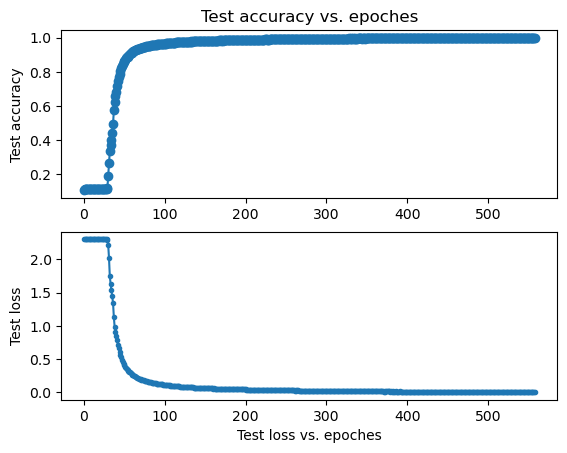

In [11]:
draw(559,vggloss_list,vggaccuracy_list)

In [13]:
resnetexample = torchvision.models.resnet18(pretrained=True)
resnetexample.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  
resnetexample.fc = nn.Linear(resnetexample.fc.in_features,10)
resnetexample = resnetexample.to(device)
lr = 0.0001
epoches = 20
resnetcriterion = nn.CrossEntropyLoss().to(device)
resnetoptimizer = torch.optim.Adam(resnetexample.parameters(),lr=lr)
resnetloss_list = []
resnetaccuracy_list = []
resnetloss_list1 = []
resnetaccuracy_list1 = []

for epoch in range(epoches):
    train_loss = 0
    train_acc = 0
    for img,label in trainloaderresnet:
        img,label = img.to(device),label.to(device)
        output = resnetexample(img)
        loss = resnetcriterion(output,label)
        resnetoptimizer.zero_grad()
        loss.backward()
        resnetoptimizer.step()
        train_loss += loss.item()
        _,pred = output.max(1)
        num_correct = (pred==label).sum().item()
        acc = num_correct / img.shape[0]
        train_acc += acc
    resnetloss_list.append(train_loss/len(trainloaderresnet))
    resnetaccuracy_list.append(train_acc/len(trainloaderresnet))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}'.format(epoch+1, train_loss/len(trainloaderresnet), train_acc/len(trainloaderresnet)))
draw(epoches,vggloss_list,vggaccuracy_list)


d:\study\pytorch\anaconda\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\study\pytorch\anaconda\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 1, Train Loss: 0.061542, Train Acc: 0.984258
epoch: 2, Train Loss: 0.019835, Train Acc: 0.994037


KeyboardInterrupt: 

In [15]:
test_loss = 0
test_acc = 0
for img,label in testloaderresnet:
    img,label = img.to(device),label.to(device)
    output = resnetexample(img)
    loss = resnetcriterion(output,label)
    resnetoptimizer.zero_grad()
    test_loss += loss.item()
    _,pred = output.max(1)
    num_correct = (pred==label).sum().item()
    acc = num_correct / img.shape[0]
    test_acc += acc
resnetloss_list1.append(test_loss/len(testloader))
resnetaccuracy_list1.append(test_acc/len(testloader))
print('Test Loss: {:.6f}, Test Acc: {:.6f}'.format( test_loss/len(testloaderresnet), test_acc/len(testloaderresnet)))

Test Loss: 0.025283, Test Acc: 0.991913
